In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from epitools import get_data
from scipy.stats import pearsonr

In [2]:
regions = {
    "Región De Arica Y Parinacota": 15, 
    "Región De Tarapacá": 1,
    "Región De Antofagasta": 2,
    "Región De Atacama": 3,
    "Región De Coquimbo": 4,
    "Región De Valparaíso": 5,
    "Región Metropolitana De Santiago": 13,
    "Región Del Libertador Gral. Bernardo O'higgins": 6,
    "Región Del Maule": 7,
    "Región Del Biobío": 8,
    "Región del Ñuble": 16,
    "Región De La Araucanía": 9,
    "Región De Los Ríos": 14,
    "Región De Los Lagos": 10,
    "Región De Aysén Del Gral. Carlos Ibáñez Del Campo": 11,
    "Región De Magallanes Y De La Antártica Chilena": 12,
    "Región De Magallanes Y De La Antártica Chilena": 12
}

In [3]:
df_rurality = pd.read_csv("../data_external/Chile/rurality_2017.csv")
df_rurality = df_rurality[["Unidad territorial", " 2017"]]\
    .rename(columns={"Unidad territorial": "region", " 2017": "rurality"})

df_rurality["region_id"] = df_rurality["region"].replace(regions).astype(int)
df_rurality.head()

,region,rurality,region_id
0,Región De Arica Y Parinacota,8.332449,15
1,Región De Tarapacá,6.199517,1
2,Región De Antofagasta,5.890370,2
3,Región De Atacama,8.962567,3
4,Región De Coquimbo,18.805786,4


In [4]:
df_poverty = pd.read_csv("../data_external/Chile/poverty_2020.csv")
df_poverty = df_poverty[["Unidad territorial", " 2020"]]\
    .rename(columns={"Unidad territorial": "region", " 2020": "poverty"})

df_poverty["region_id"] = df_poverty["region"].replace(regions).astype(int)
df_poverty.head()

,region,poverty,region_id
0,Región De Arica Y Parinacota,11.9,15
1,Región De Tarapacá,14.0,1
2,Región De Antofagasta,9.3,2
3,Región De Atacama,9.5,3
4,Región De Coquimbo,11.7,4


In [5]:
df_gini = pd.DataFrame(
    [(0.50, 13), (0.47, 9), (0.47, 11), (0.47, 14),
    (0.46, 10), (0.46, 12), (0.46, 8), (0.45, 3),
    (0.45, 4), (0.45, 5), (0.44, 7), (0.43, 2), (0.42, 1), (0.41, 15), (0.40, 6)], columns=["gini", "region_id"])

In [6]:
df_income = pd.read_csv("../data_external/Chile/monetary_income_2020.csv")
df_income = df_income[["Unidad territorial", " 2020"]]\
    .rename(columns={"Unidad territorial": "region", " 2020": "income"})

df_income["region_id"] = df_income["region"].replace(regions).astype(int)
df_income.head()

,region,income,region_id
0,Región De Arica Y Parinacota,7.800992e+05,15
1,Región De Tarapacá,9.695093e+05,1
2,Región De Antofagasta,1.110884e+06,2
3,Región De Atacama,8.918012e+05,3
4,Región De Coquimbo,7.519408e+05,4


In [7]:
year = 2021

df_dv = get_data(
    country="Chile",
    year=year,
    election="first_round",
    aggregation="region_id",
    method="nv"
)
df_dv["region_id"] = df_dv["region_id"].astype(int)

In [8]:
df = pd.merge(df_dv, df_rurality, on="region_id")
df = pd.merge(df, df_poverty, on="region_id")
df = pd.merge(df, df_income, on="region_id")
df = pd.merge(df, df_gini, on="region_id")

data = df[["epi", "epi_between", "epi_within", "gini", "income", "rurality", "poverty"]]
data.head()

,epi,epi_between,epi_within,gini,income,rurality,poverty
0,0.908729,0.819699,0.089031,0.42,9.695093e+05,6.199517,14.0
1,0.931645,0.846859,0.084786,0.46,8.001562e+05,26.387461,11.3
2,0.938808,0.863529,0.075278,0.47,9.987045e+05,20.415285,6.6
3,0.888914,0.823445,0.065470,0.46,1.126894e+06,8.097494,5.7
4,0.907698,0.811417,0.096281,0.50,1.204524e+06,3.704557,9.0


In [9]:
df_dv.sort_values("epi", ascending=False)

,region_id,epi,epi_between,epi_within,year
9,3,0.972614,0.867094,0.105520,2021
10,4,0.962770,0.873966,0.088804,2021
12,6,0.941856,0.872491,0.069365,2021
2,11,0.938808,0.863529,0.075278,2021
1,10,0.931645,0.846859,0.084786,2021
14,8,0.929492,0.841752,0.087740,2021
13,7,0.927793,0.845293,0.082500,2021
11,5,0.919180,0.832861,0.086318,2021
5,14,0.914300,0.832361,0.081940,2021
0,1,0.908729,0.819699,0.089031,2021


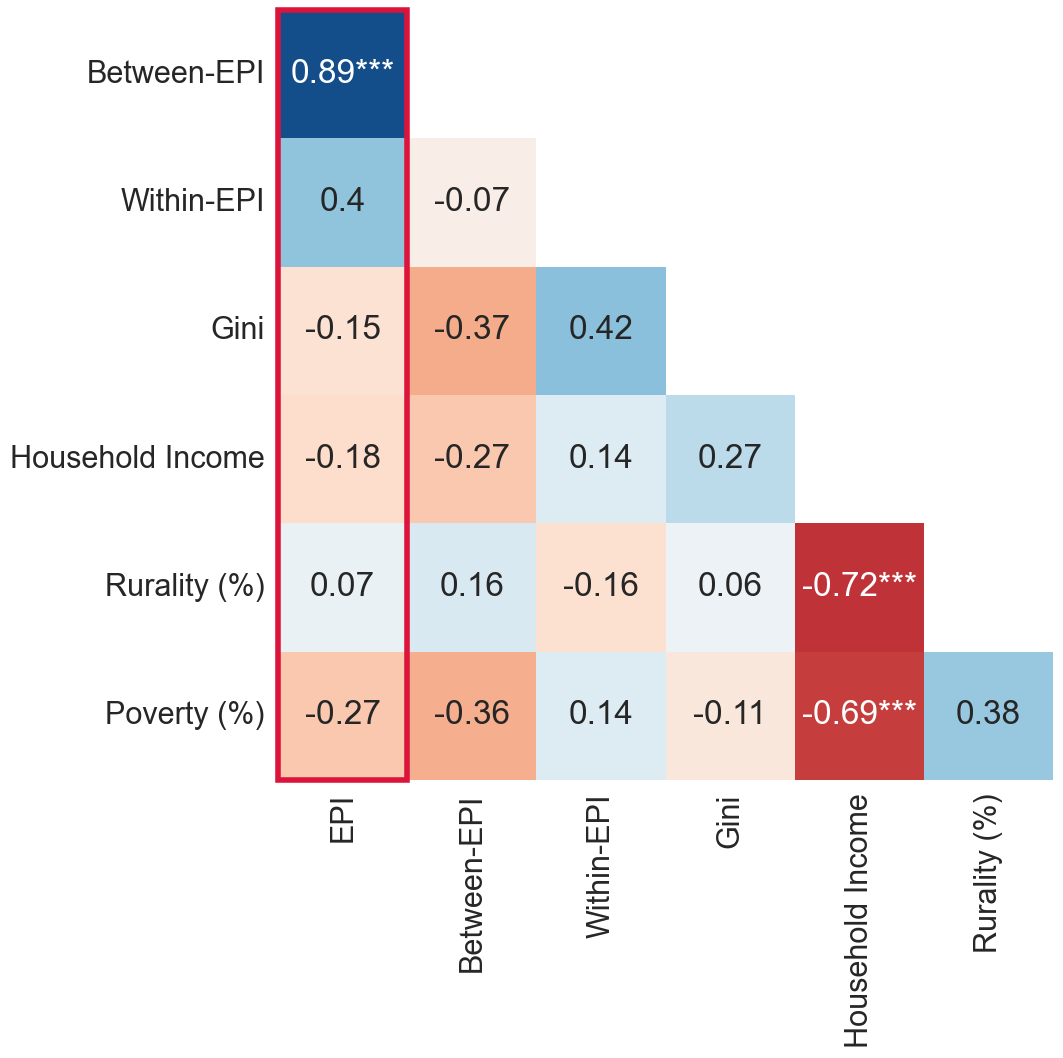

In [10]:
def set_corr(corr, _):
    corr = round(corr, 3)
    if _ < 0.01:
        return f"{corr}***"
    elif _ < 0.05:
        return f"{corr}**"
    elif _ < 0.1:
        return f"{corr}*"
    return corr

sns.set_style("whitegrid")
sns.set(font_scale=2, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = True

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

dd = data.copy() #, "household_income"
dd = dd.rename(columns={
    "epi": "EPI",
    "epi_between": "Between-EPI",
    "epi_within": "Within-EPI",
    "poverty": "Poverty (%)",
    "gini": "Gini",
    "income": "Household Income",
    "rurality": "Rurality (%)"
})
# dd["Rurality (%)"] = dd["Rurality (%)"].astype(float)

corr_m = dd.corr()
rho = dd.corr()
pval = dd.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)

p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")
# print(p)
labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")
#  
g = sns.heatmap(heatmap_data, annot=p, vmin=-1, vmax=1, ax=ax, cmap="RdBu", fmt="", cbar=False)

g.set_ylim(heatmap_data.shape[0], 0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

from matplotlib.patches import Rectangle

wanted_label = 'Divisiveness'
wanted_index = 0 #labels.index(wanted_label)
N = len(list(heatmap_data))
x, y, w, h = 0, wanted_index, N, 1
for _ in range(1):
    g.add_patch(Rectangle((x, y), h, w, fill=False, edgecolor='crimson', lw=4, clip_on=False))

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('EPI ~ Gini', data=dd).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    EPI   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.2899
Date:                Tue, 28 Mar 2023   Prob (F-statistic):              0.599
Time:                        11:44:42   Log-Likelihood:                 33.737
No. Observations:                  15   AIC:                            -63.47
Df Residuals:                      13   BIC:                            -62.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9897      0.127      7.815      0.0

C:\Users\cnava\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
dd.to_csv("Chile.csv", index=False)